<h1>REGIONE LIGURIA</h1>

Confronto dei dati relativi ai decessi registrati dall'ISTAT e i decessi causa COVID-19 registrati dalla Protezione Civile Italiana con i decessi previsti dal modello predittivo SARIMA.

<h2>DECESSI MENSILI REGIONE LIGURIA ISTAT</h2>

Il DataFrame contiene i dati relativi ai decessi mensili della regione <b>Liguria</b> dal <b>2015</b> al <b>30 gigno 2020</b>.

In [1]:
import matplotlib.pyplot as plt

import pandas as pd
decessi_istat = pd.read_csv('../../csv/regioni/liguria.csv')
decessi_istat.head()

,DATA,TOTALE
0,2015-01-31,2229
1,2015-02-28,2109
2,2015-03-31,2022
3,2015-04-30,1770
4,2015-05-31,1742


In [2]:
decessi_istat['DATA'] = pd.to_datetime(decessi_istat['DATA'])
decessi_istat.TOTALE = pd.to_numeric(decessi_istat.TOTALE)


<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [3]:
decessi_istat = decessi_istat[decessi_istat['DATA'] > '2020-02-29']
decessi_istat.head()


,DATA,TOTALE
62,2020-03-31,2973
63,2020-04-30,2759
64,2020-05-31,1744
65,2020-06-30,1564


<h3>Creazione serie storica dei decessi ISTAT</h3>

In [4]:
decessi_istat = decessi_istat.set_index('DATA')
decessi_istat = decessi_istat.TOTALE
decessi_istat

DATA
2020-03-31    2973
2020-04-30    2759
2020-05-31    1744
2020-06-30    1564
Name: TOTALE, dtype: int64

<h2>DECESSI MENSILI REGIONE LIGURIA CAUSATI DAL COVID</h2>

Il DataFrame contine i dati forniti dalla Protezione Civile relativi ai decessi mensili della regione <b>Liguria</b> da <b> marzo 2020</b> al <b>30 giugno 2020</b>.

In [5]:
covid = pd.read_csv('../../csv/regioni_pesate/liguria.csv')
covid.head()

,data,deceduti
0,2020-03-31,402.32
1,2020-04-30,694.66
2,2020-05-31,280.12
3,2020-06-30,87.42


In [6]:
covid['data'] = pd.to_datetime(covid['data'])
covid.deceduti = pd.to_numeric(covid.deceduti)

In [7]:
covid = covid.set_index('data')
covid.head()

,deceduti
data,
2020-03-31,402.32
2020-04-30,694.66
2020-05-31,280.12
2020-06-30,87.42


<h3>Creazione serie storica dei decessi COVID-19</h3>

In [8]:
covid = covid.deceduti

<h2>PREDIZIONE DECESSI MENSILI REGIONE SECONDO MODELLO SARIMA</h2>

Il DataFrame contiene i dati riguardanti i decessi mensili della regione <b>Liguria</b> secondo la predizione del modello SARIMA applicato. 

In [9]:
predictions = pd.read_csv('../../csv/pred/predictions_SARIMA_liguria.csv')
predictions.head()

,Unnamed: 0,predicted_mean
0,2015-01-31,0.000000
1,2015-02-28,2216.760983
2,2015-03-31,2132.398049
3,2015-04-30,2056.908691
4,2015-05-31,1866.239824


In [10]:
predictions.rename(columns={'Unnamed: 0': 'Data', 'predicted_mean':'Totale'}, inplace=True)
predictions.head()

,Data,Totale
0,2015-01-31,0.000000
1,2015-02-28,2216.760983
2,2015-03-31,2132.398049
3,2015-04-30,2056.908691
4,2015-05-31,1866.239824


In [11]:
predictions['Data'] = pd.to_datetime(predictions['Data'])
predictions.Totale = pd.to_numeric(predictions.Totale)

<h3>Recupero dei dati inerenti al periodo COVID-19</h3>

In [12]:
predictions = predictions[predictions['Data'] > '2020-02-29']
predictions.head()

,Data,Totale
62,2020-03-31,1825.345656
63,2020-04-30,1731.877000
64,2020-05-31,1701.781936
65,2020-06-30,1748.899458


In [13]:
predictions = predictions.set_index('Data')
predictions.head()

,Totale
Data,
2020-03-31,1825.345656
2020-04-30,1731.877000
2020-05-31,1701.781936
2020-06-30,1748.899458



<h3>Creazione serie storica dei decessi secondo la predizione del modello</h3>

In [14]:
predictions = predictions.Totale

<h1>INTERVALLI DI CONFIDENZA

<h3>Limite massimo

In [15]:
upper = pd.read_csv('../../csv/upper/predictions_SARIMA_liguria_upper.csv')
upper.head()

,Unnamed: 0,upper TOTALE
0,2015-01-31,4023.047659
1,2015-02-28,2637.770032
2,2015-03-31,2538.258961
3,2015-04-30,2459.247608
4,2015-05-31,2267.266035


In [16]:
upper.rename(columns={'Unnamed: 0': 'Data', 'upper TOTALE':'Totale'}, inplace=True)
upper['Data'] = pd.to_datetime(upper['Data'])
upper.Totale = pd.to_numeric(upper.Totale)
upper.head()

,Data,Totale
0,2015-01-31,4023.047659
1,2015-02-28,2637.770032
2,2015-03-31,2538.258961
3,2015-04-30,2459.247608
4,2015-05-31,2267.266035


In [17]:
upper = upper[upper['Data'] > '2020-02-29']
upper = upper.set_index('Data')
upper.head()

,Totale
Data,
2020-03-31,2155.410425
2020-04-30,2062.104239
2020-05-31,2032.041233
2020-06-30,2080.917624


In [18]:
upper = upper.Totale

<h3>Limite minimo

In [19]:
lower = pd.read_csv('../../csv/lower/predictions_SARIMA_liguria_lower.csv')
lower.head()

,Unnamed: 0,lower TOTALE
0,2015-01-31,-4023.047659
1,2015-02-28,1795.751934
2,2015-03-31,1726.537138
3,2015-04-30,1654.569773
4,2015-05-31,1465.213612


In [20]:
lower.rename(columns={'Unnamed: 0': 'Data', 'lower TOTALE':'Totale'}, inplace=True)
lower['Data'] = pd.to_datetime(lower['Data'])
lower.Totale = pd.to_numeric(lower.Totale)
lower.head()

,Data,Totale
0,2015-01-31,-4023.047659
1,2015-02-28,1795.751934
2,2015-03-31,1726.537138
3,2015-04-30,1654.569773
4,2015-05-31,1465.213612


In [21]:
lower = lower[lower['Data'] > '2020-02-29']
lower = lower.set_index('Data')
lower.head()

,Totale
Data,
2020-03-31,1495.280887
2020-04-30,1401.649760
2020-05-31,1371.522638
2020-06-30,1416.881292


In [22]:
lower = lower.Totale

<h1> CONFRONTO DELLE SERIE STORICHE </h1>

Di seguito il confronto grafico tra le serie storiche dei <b>decessi totali mensili</b>, dei <b>decessi causa COVID-19</b> e dei <b>decessi previsti dal modello SARIMA</b> della regione <b>Liguria</b>.
<br />
I mesi di riferimento sono: <b>marzo</b>, <b>aprile</b>, <b>maggio</b> e <b>giugno</b>.

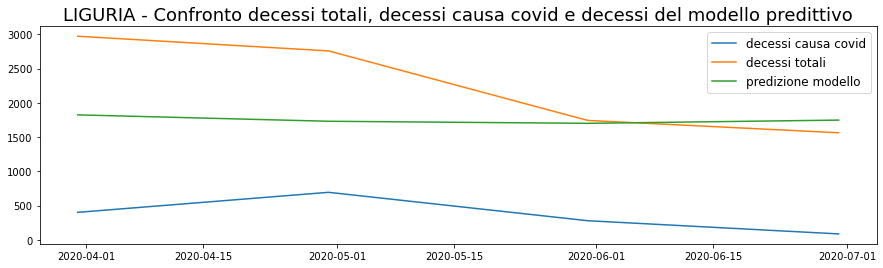

In [23]:
plt.figure(figsize=(15,4))
plt.title('LIGURIA - Confronto decessi totali, decessi causa covid e decessi del modello predittivo', size=18)
plt.plot(covid, label='decessi causa covid')
plt.plot(decessi_istat, label='decessi totali')
plt.plot(predictions, label='predizione modello')
plt.legend(prop={'size': 12})
plt.show()

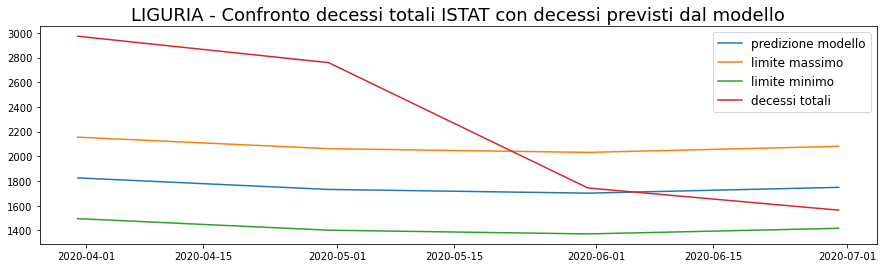

In [24]:
plt.figure(figsize=(15,4))
plt.title("LIGURIA - Confronto decessi totali ISTAT con decessi previsti dal modello", size=18)
plt.plot(predictions, label='predizione modello')
plt.plot(upper, label='limite massimo')
plt.plot(lower, label='limite minimo')
plt.plot(decessi_istat, label='decessi totali')
plt.legend(prop={'size': 12})
plt.show()

<h3>Calcolo dei decessi COVID-19 secondo il modello predittivo</h3>

Differenza tra i decessi totali rilasciati dall'ISTAT e i decessi secondo la previsione del modello SARIMA.

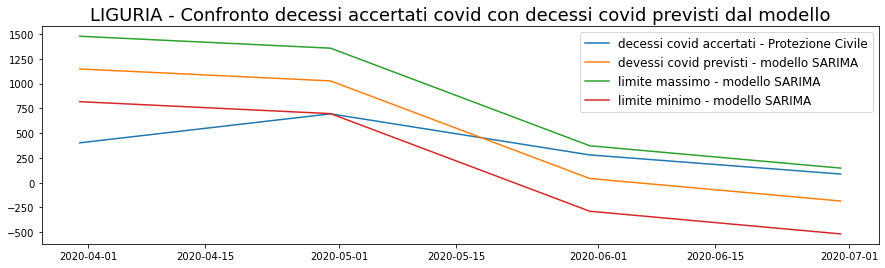

In [25]:
n = decessi_istat - predictions
n_upper = decessi_istat - lower
n_lower = decessi_istat - upper

plt.figure(figsize=(15,4))
plt.title("LIGURIA - Confronto decessi accertati covid con decessi covid previsti dal modello", size=18)
plt.plot(covid, label='decessi covid accertati - Protezione Civile')
plt.plot(n, label='devessi covid previsti - modello SARIMA')
plt.plot(n_upper, label='limite massimo - modello SARIMA')
plt.plot(n_lower, label='limite minimo - modello SARIMA')
plt.legend(prop={'size': 12})
plt.show()

Gli <b>intervalli</b> corrispondono alla differenza tra i decessi totali forniti dall'ISTAT per i mesi di marzo, aprile, maggio e giugno 2020 e i valori degli <b>intervalli di confidenza</b> (intervallo superiore e intervallo inferiore) del modello predittivo SARIMA dei medesimi mesi.

<h3>Numero totale dei decessi accertati COVID-19 per la regione Liguria</h3>

In [26]:
m = covid.sum()
print(int(m))

1464


<h3>Numero totale dei decessi COVID-19 previsti dal modello per la regione Liguria </h3>

<h4>Valore medio

In [27]:
total = n.sum()
print(int(total))

2032


<h4>Valore massimo

In [28]:
total_upper = n_upper.sum()
print(int(total_upper))

3354


<h4>Valore minimo

In [30]:
total_lower = n_lower.sum()
print(int(total_lower))

709


<h3>Calcolo del numero dei decessi COVID-19 non registrati secondo il modello predittivo SARIMA della regione Liguria</h3>

<h4>Valore medio

In [31]:
x = decessi_istat - predictions - covid
x = x.sum()
print(int(x))

567


<h4>Valore massimo 

In [34]:
x_upper = decessi_istat - upper - covid
x_upper = x_upper.sum()
print(int(x_upper))

-754


<h4>Valore minimo

In [35]:
x_lower = decessi_istat - lower - covid
x_lower = x_lower.sum()
print(int(x_lower))

1890
